# Prep

In [1]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
import torch.nn.functional as F

In [2]:
import models
from experiments import perform_test
from data_preparation import gen_files

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [5]:
# path to train dir

train_dir = r"C:\Users\rafci\Desktop\tensorflow-speech-recognition-challenge\train"
if not os.path.exists(train_dir):
    train_dir = r"C:\Users\jakub\Desktop\PD\sem10\deep\tensorflow-speech-recognition-challenge\train"

In [6]:
# run once to generate dataset files

# gen_files(train_dir)

In [7]:
# reading data from generated files 
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")

X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

X_train = X_train.reshape((-1, X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((-1, X_val.shape[1], X_val.shape[2]))

classes = os.listdir(train_dir+'/audio/')

def convert_list_dict(lst):
    res_dct = {i: val for i, val in enumerate(lst)}
    return res_dct
         
classes_index = convert_list_dict(classes)
INPUT_SHAPE = (85, 122)
CLASSES_COUNT = len(classes)

In [8]:
# creating datasets
y_train = torch.tensor(y_train).long()
y_val = torch.tensor(y_val).long()
X_train = torch.tensor(X_train)
X_val = torch.tensor(X_val)

y_train = F.one_hot(y_train, num_classes = CLASSES_COUNT)

train_data = TensorDataset(X_train.float().transpose(2, 1), y_train.float())
valid_data = TensorDataset(X_val.float().transpose(2, 1), y_val.float())

### params

In [9]:
num_epochs = 10
batch_size = 64
lr = 0.0005
weight_decay = 1e-8

In [10]:
# trans params
num_heads=5
ffn_dim=256
num_layers = 4
dropout = 0

# inception params
num_filters = 32
use_residual = True
use_bottleneck = True
depth = 10
kernel_size = 41
bottleneck_size = 32 * 4

# Tests

## Model tests

### Inception test

In [11]:
model = models.InceptionClassifier(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = None

Epoch [1/10], Train loss: 0.0012
Test accuracy: 0.8738119608129844
Epoch [2/10], Train loss: 0.0005
Test accuracy: 0.9187015645562217
Epoch [3/10], Train loss: 0.0009
Test accuracy: 0.9330311449042258
Epoch [4/10], Train loss: 0.0006
Test accuracy: 0.9473607252522298
Epoch [5/10], Train loss: 0.0006
Test accuracy: 0.9488229273285568
Epoch [6/10], Train loss: 0.0004
Test accuracy: 0.9508700102354145
Epoch [7/10], Train loss: 0.0007
Test accuracy: 0.9537944143880684
Epoch [8/10], Train loss: 0.0002
Test accuracy: 0.9552566164643954
Epoch [9/10], Train loss: 0.0003
Test accuracy: 0.9540868548033338
Epoch [10/10], Train loss: 0.0002
Test eval:
              precision    recall  f1-score   support

         yes     0.9434    0.9579    0.9506       261
          no     0.9194    0.9296    0.9245       270
          up     0.7898    0.9538    0.8641       260
        down     0.9570    0.9280    0.9423       264
        left     0.9170    0.9838    0.9492       247
       right     0.8885    

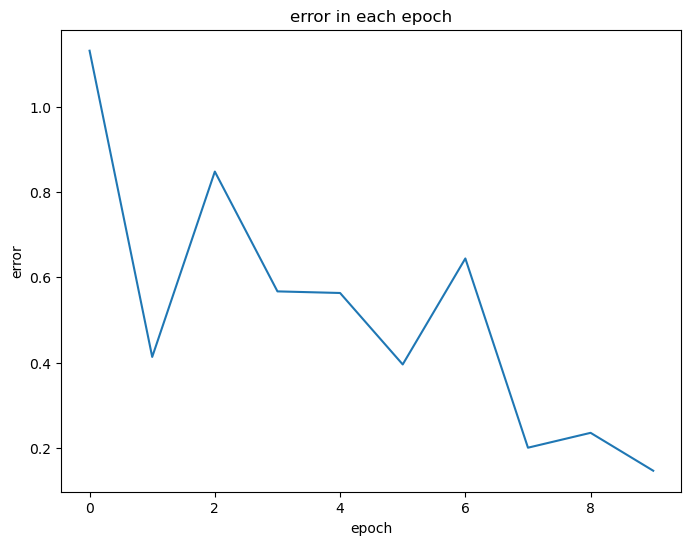

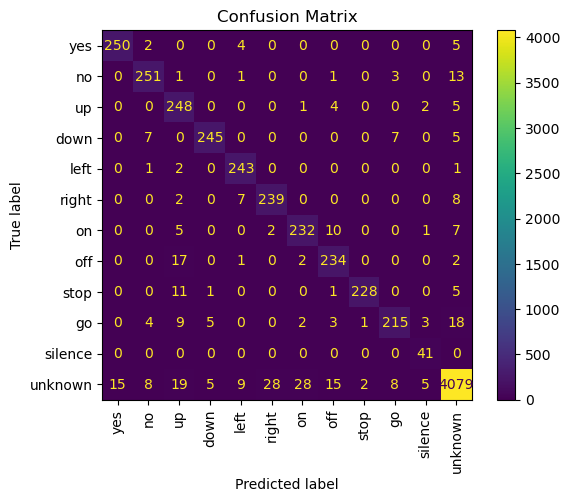

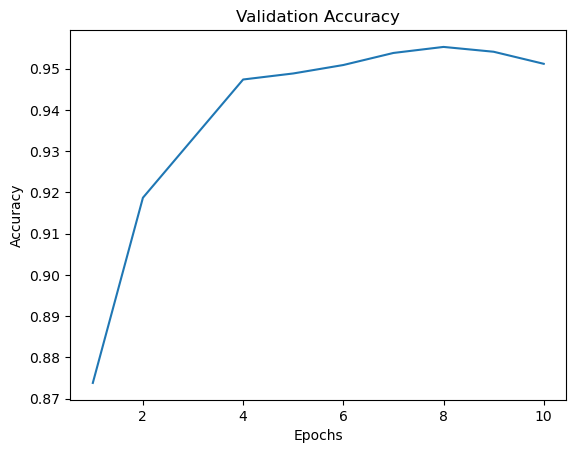

In [12]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False)

### Mod Inception test

In [11]:
model = models.InceptionClassifierMod(INPUT_SHAPE, CLASSES_COUNT, num_filters, use_residual, use_bottleneck, depth, kernel_size, bottleneck_size)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = None

Epoch [1/10], Train loss: 0.0011
Test accuracy: 0.9109518935516888
Epoch [2/10], Train loss: 0.0008
Test accuracy: 0.9295218599210411
Epoch [3/10], Train loss: 0.0005
Test accuracy: 0.9387337330019009
Epoch [4/10], Train loss: 0.0006
Test accuracy: 0.9498464687819856
Epoch [5/10], Train loss: 0.0006
Test accuracy: 0.9518935516888434
Epoch [6/10], Train loss: 0.0004
Test accuracy: 0.9508700102354145
Epoch [7/10], Train loss: 0.0009
Test accuracy: 0.9559877175025588
Epoch [8/10], Train loss: 0.0004
Test accuracy: 0.9586196812399473
Epoch [9/10], Train loss: 0.0001
Test accuracy: 0.9571574791636204
Epoch [10/10], Train loss: 0.0001
Test eval:
              precision    recall  f1-score   support

         yes     1.0000    0.9425    0.9704       261
          no     0.9176    0.9074    0.9125       270
          up     0.7771    0.9654    0.8611       260
        down     0.9715    0.9053    0.9373       264
        left     0.9269    0.9757    0.9507       247
       right     0.9841    

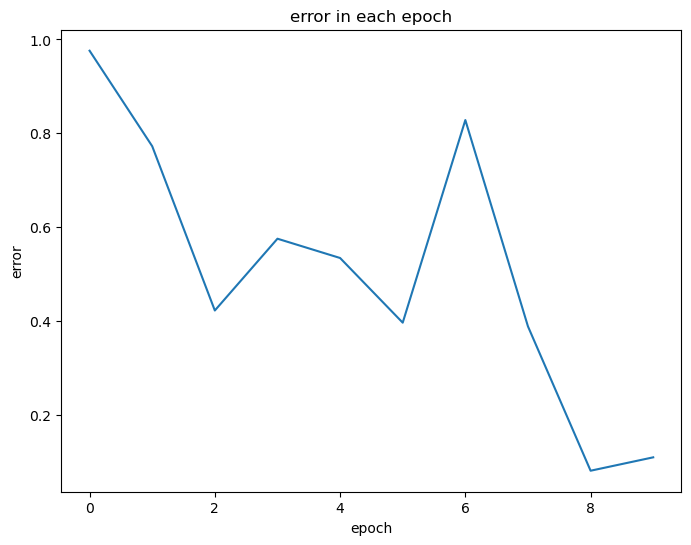

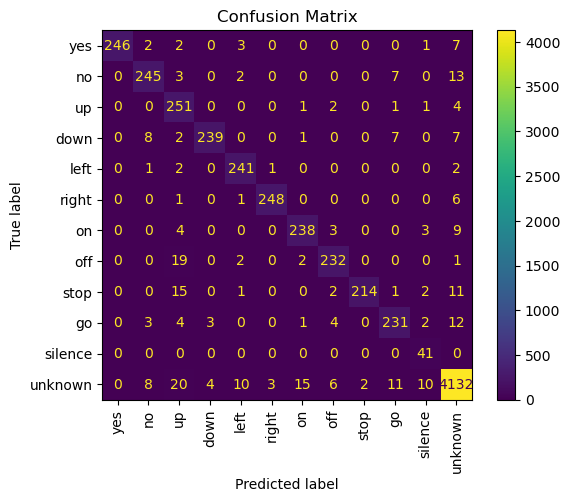

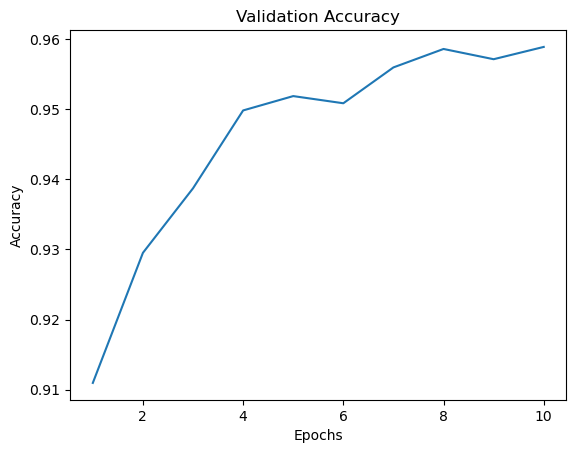

In [12]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes=classes_index,
                     trans_mode = False)

### Conformer test

In [13]:
model = models.ConformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = None

c:\ProgramData\anaconda3\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch [1/10], Train loss: 0.0008
Test accuracy: 0.8710337768679631
Epoch [2/10], Train loss: 0.0004
Test accuracy: 0.9093434712677292
Epoch [3/10], Train loss: 0.0003
Test accuracy: 0.9087585904371984
Epoch [4/10], Train loss: 0.0001
Test accuracy: 0.9137300774967101
Epoch [5/10], Train loss: 0.0005
Test accuracy: 0.9219184091241409
Epoch [6/10], Train loss: 0.0002
Test accuracy: 0.9181166837256909
Epoch [7/10], Train loss: 0.0004
Test accuracy: 0.9225032899546718
Epoch [8/10], Train loss: 0.0001
Test accuracy: 0.9206024272554467
Epoch [9/10], Train loss: 0.0001
Test accuracy: 0.9225032899546718
Epoch [10/10], Train loss: 0.0000
Test eval:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


              precision    recall  f1-score   support

         0.0     0.9490    0.9442    0.9466       197
         1.0     0.9935    0.9506    0.9716       162
         2.0     0.9641    0.9583    0.9612       168
         3.0     0.9864    0.8529    0.9148       170
         4.0     0.8850    0.9621    0.9220       264
         5.0     0.9545    0.9506    0.9526       243
         6.0     0.9630    0.8595    0.9083       242
         7.0     0.8599    0.9643    0.9091       280
         8.0     0.9589    0.8077    0.8768       260
         9.0     1.0000    0.9788    0.9893       189
        10.0     0.9655    0.9711    0.9683       173
        11.0     0.9066    0.9433    0.9246       247
        12.0     0.9745    0.9563    0.9653       160
        13.0     0.9153    0.9391    0.9270       230
        14.0     0.8576    0.9370    0.8956       270
        15.0     0.8638    0.9414    0.9009       256
        16.0     0.8996    0.9066    0.9031       257
        17.0     0.8588    

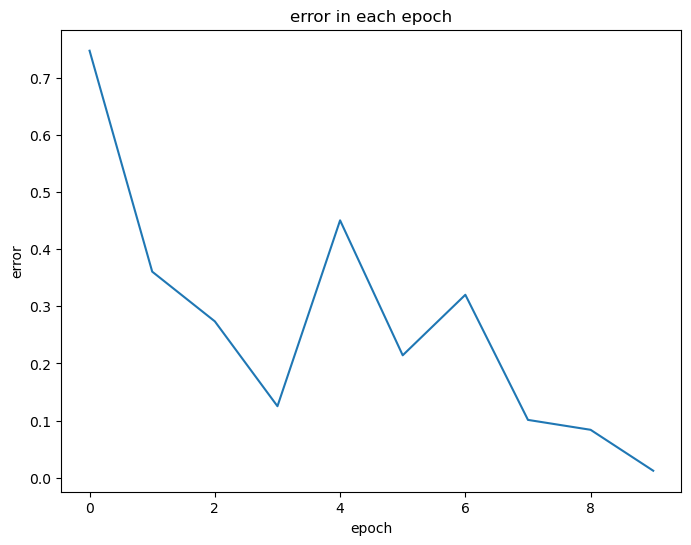

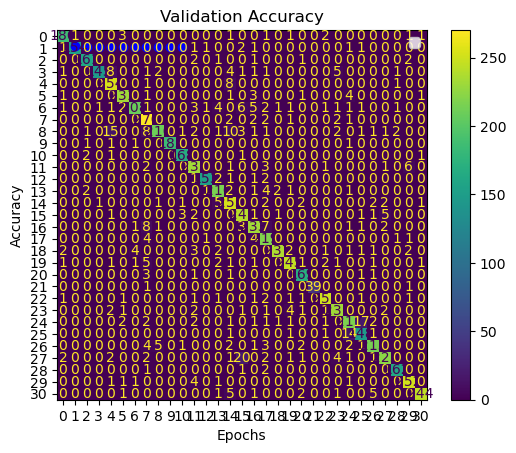

In [14]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes = classes_index,
                     trans_mode = True)

### Emformer test

In [14]:
model = models.EmformerClassifier(num_classes = 31, input_length = INPUT_SHAPE[1], input_dim = INPUT_SHAPE[0], num_heads = num_heads, ffn_dim = ffn_dim, num_layers = num_layers, dropout = dropout)

model.to(DEVICE)
if DEVICE == torch.device('cuda'):
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
scheduler = None

Epoch [1/10], Train loss: 0.0030
Test accuracy: 0.6781693230004386
Epoch [2/10], Train loss: 0.0017
Test accuracy: 0.7454306185114783
Epoch [3/10], Train loss: 0.0016
Test accuracy: 0.7963152507676561
Epoch [4/10], Train loss: 0.0010
Test accuracy: 0.8160549787980699
Epoch [5/10], Train loss: 0.0016
Test accuracy: 0.8211726860652142
Epoch [6/10], Train loss: 0.0007
Test accuracy: 0.8302383389384413
Epoch [7/10], Train loss: 0.0005
Test accuracy: 0.8240970902178681
Epoch [8/10], Train loss: 0.0003
Test accuracy: 0.8412048545108934
Epoch [9/10], Train loss: 0.0003
Test accuracy: 0.8293610176926451
Epoch [10/10], Train loss: 0.0002
Test eval:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


              precision    recall  f1-score   support

         0.0     0.7064    0.8426    0.7685       197
         1.0     0.8599    0.8333    0.8464       162
         2.0     0.8767    0.7619    0.8153       168
         3.0     0.8992    0.6294    0.7405       170
         4.0     0.7592    0.8598    0.8064       264
         5.0     0.7934    0.8848    0.8366       243
         6.0     0.7689    0.8388    0.8024       242
         7.0     0.9423    0.8750    0.9074       280
         8.0     0.7133    0.7846    0.7473       260
         9.0     0.9261    0.8624    0.8932       189
        10.0     0.9509    0.8960    0.9226       173
        11.0     0.8423    0.8219    0.8320       247
        12.0     0.8059    0.8562    0.8303       160
        13.0     0.7273    0.8696    0.7921       230
        14.0     0.8340    0.7815    0.8069       270
        15.0     0.8075    0.7539    0.7798       256
        16.0     0.7969    0.7938    0.7953       257
        17.0     0.8981    

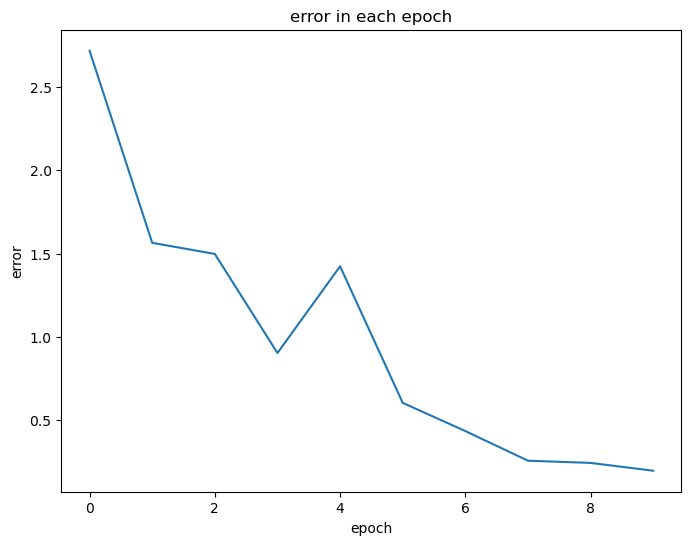

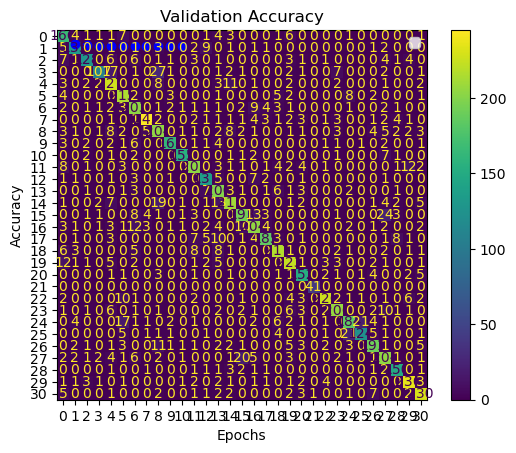

In [15]:
model = perform_test(model = model, 
                     train_data = train_data, 
                     test_data = valid_data, 
                     batch_size = batch_size, 
                     num_epochs = num_epochs, 
                     criterion = criterion, 
                     optimizer = optimizer, 
                     scheduler = scheduler,
                     device = DEVICE,
                     all_classes = classes_index,
                     trans_mode = True)

## Approaches tests

In [ ]:
# TODO

## Augmentation tests

In [ ]:
# TODO

## Hyperparametres tests

In [ ]:
# TODO